In [7]:
import pandas as pd
from sklearn.model_selection import cross_val_score


In [8]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
import numpy as np # Para manejo de arrays, operaciones matemáticas, etc.
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

class ClasificadorGroso(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

class ClasificadorExhaustivo(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.ones((len(X), 1), dtype=bool)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [9]:
EXPORT_PATH = 'push-up-reload.csv'

In [10]:
df = pd.read_csv(EXPORT_PATH)
df['class'].value_counts()

1    4296
0    2730
Name: class, dtype: int64

In [11]:
X = df.drop('class', axis=1) # features
t = df['class'] # target

In [17]:
# Separamos en entrenamiento y testeo
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=1234)

In [15]:
# Separamos en entrenamiento y testeo
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=42)

In [20]:
# transformamos para clasificación binaria, si es 1 la etiqueta es True
t_train_1 = (t_train == 1)
t_test_1 = (t_test == 1)

In [13]:
class ClasificadorGroso(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [21]:
clasificador_groso = ClasificadorGroso()
clasificador_groso = clasificador_groso.fit(X_train, t_train_1)

scores = cross_val_score(clasificador_groso, X_train, t_train_1, cv=3,scoring="accuracy")
print("Scores:", scores)
print("Media:", scores.mean())


Scores: [0.39329268 0.38377059 0.38194021]
Media: 0.38633449406489184


Un 38.6% de accuracy! 

In [24]:
unos = np.count_nonzero(t_train == True)
no_unos = np.count_nonzero(t_train_1 == False)
ratio_no_unos = no_unos / (unos + no_unos)

print("Cantidad de 1:", unos)
print("Cantidad de No 1:", no_unos)
print("Porcentaje \"No unos\":", ratio_no_unos)

Cantidad de 1: 3018
Cantidad de No 1: 1900
Porcentaje "No unos": 0.3863359089060594


Matriz de confusion

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

#Usamos CV para calcular las predicciones

clasificador_groso = clasificador_groso.fit(X_train, t_train_1)
t_train_pred_CG = cross_val_predict(clasificador_groso, X_train, t_train_1, cv=5)

cm = confusion_matrix(t_train_1, t_train_pred_CG)

print(cm)

[[1900    0]
 [3018    0]]


In [28]:
import pandas as pd

#código para mostrar las matrices de confusión más bonitas
#https://stackoverflow.com/questions/50325786/sci-kit-learn-how-to-print-labels-for-confusion-matrix

def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

cm_groso = cm2df(cm, ["No uno", "Uno"])
print(cm_groso)

        No uno  Uno
No uno    1900    0
Uno       3018    0


C:\Users\User\AppData\Local\Temp\ipykernel_17784\2750347518.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
C:\Users\User\AppData\Local\Temp\ipykernel_17784\2750347518.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))


In [33]:
from sklearn.linear_model import Perceptron
import numpy as np

perce = Perceptron()
phi = X_train.copy()

scores = cross_val_score(perce, phi, t_train_1, cv=5, scoring="accuracy")
print('Scores: {}'.format(np.round(scores,4)))
print('Media (recordemos que es accuracy): {}'.format(round(scores.mean(),4)))

Scores: [0.8902 0.8272 0.8577 0.707  0.9176]
Media (recordemos que es accuracy): 0.84


In [34]:
t_train_pred_perce = cross_val_predict(perce, phi, t_train_1, cv=5)

cm_perceptron = confusion_matrix(t_train_1, t_train_pred_perce)
cm_perceptron_linda = cm2df(cm_perceptron, ["No uno", "Uno"])

print(cm_perceptron_linda)

        No uno   Uno
No uno    1347   553
Uno        234  2784


C:\Users\User\AppData\Local\Temp\ipykernel_17784\2750347518.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
C:\Users\User\AppData\Local\Temp\ipykernel_17784\2750347518.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))


Se puede ver el ***accuracy de las predicciones positivas*** o como le decimos en el barrio: **precision (precisión)**.


$$
\mathrm{precision} = \frac{TP}{TP + FP}
$$

In [37]:
tp = cm_perceptron[1, 1]
fp = cm_perceptron[0, 1]

print('Precision: {}'.format(round(tp/(tp + fp),2)))

Precision: 0.83


Otra métrica importante Recall (Exhaustividad):
$$
\mathrm{recall} = \frac{TP}{TP + FN}
$$

In [38]:
tp = cm_perceptron[1, 1]
fp = cm_perceptron[0, 1]
fn = cm_perceptron[1, 0]

print('Precision:{}'.format(round(tp/(tp + fp),2)))
print('Recall:{}'.format(round(tp/(tp + fn),2)))

Precision:0.83
Recall:0.92


¿Cómo se lee?

"*Cuando el perceptrón dice que una imagen es arriba, acierta un 83% de las veces*"

"Detecta el 92% de la pose arriba que hay en la muestra"

Obviamente hay función de sklearn para hacerlo directo sin pasar por la matriz.

In [46]:
from sklearn.metrics import precision_score, recall_score

print('Precision: {}'.format(round(precision_score(t_train_1, t_train_pred_perce),2)))
print('Recall: {}'.format(round(recall_score(t_train_1, t_train_pred_perce),2)))

Precision: 0.83
Recall: 0.92


Precision/Recall Trade-off

Pensemos un segundo en estos valores por separado, ¿qué tan dificil puede ser tener mucha precisión? ¿y mucha exhaustividad?

La ROC  (Receiver Operating Characteristic, o Característica Operativa del Receptor) es otra herramienta muy usada con clasificadores binarios. Es muy parecida la curva PR, pero en vez de plotear la precisión contra la exhaustividad lo hace entre la tasa de verdaderos positivos (otro nombre para la exhaustividad) contra la tasa de falsos positivos (FPR). El FPR es la razón de las instancias negativas que son erróneamente marcadas como positivas.
Cuanto más alejado de la recta unidad esté el sistema mejor, pero por supuesto esto depende del problema a resolver.

In [56]:
#en las celdas de preparación hay un clasificador extremadamente exhaustivo
#lo instanciamos y medimos
clasificador_exhaustivo = ClasificadorExhaustivo()

clasificador_exhaustivo = clasificador_exhaustivo.fit(X_train, t_train_1)
exhaustivo_pred = cross_val_predict(clasificador_exhaustivo, X_train, t_train, cv=5)

# tambien se puede predecir directamente, pero mejor con CV
#exhaustivo_pred = clasificador_exhaustivo.predict(X_train)

print("Recall:",recall_score(t_train_1, exhaustivo_pred))

Recall: 1.0


In [57]:
print("Precision:",precision_score(t_train_1, exhaustivo_pred))

Precision: 0.6136640910939406


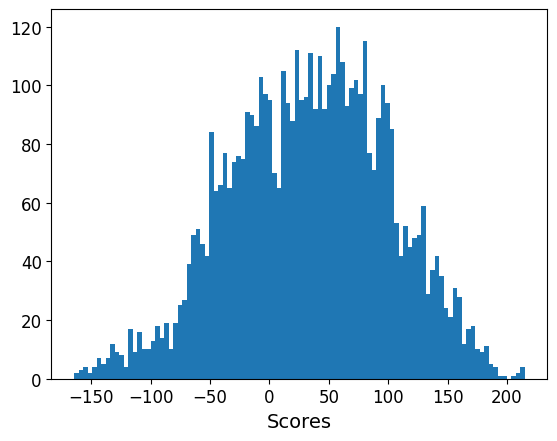

In [51]:
perce = perce.fit(phi, t_train_1)

# Se puede hacer directamente así
#scores = perce.decision_function(X_train)

# Pero mejor con CV
y_scores = cross_val_predict(perce, X_train, t_train_1, cv=5, method="decision_function")

A = plt.hist(y_scores, 100)
plt.xlabel('Scores')
plt.show()

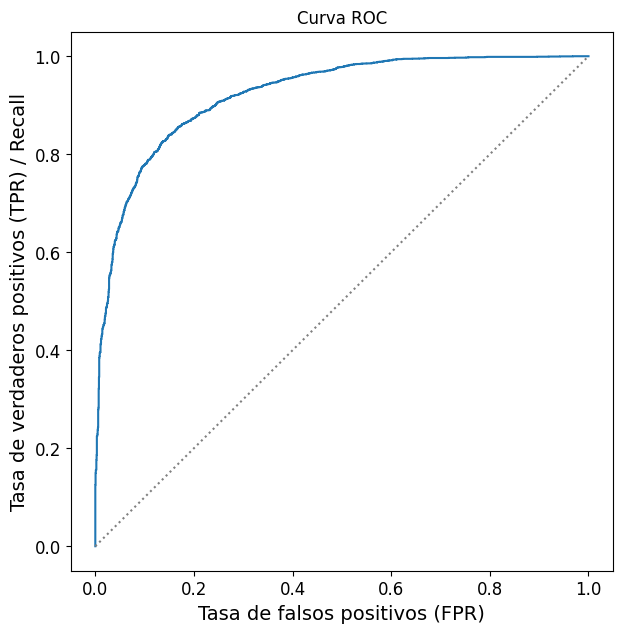

AUC: 0.9226947089393464


In [55]:
# versión sklearn

from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(t_train_1, y_scores)

fig = plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='0.5', ls=':')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR) / Recall')
plt.title('Curva ROC')
plt.show()

#se le pasan las etiquetas y los scores
roc_auc = roc_auc_score(t_train_1, y_scores)
print("AUC:", roc_auc)

# O usar directamente la funcion para plotearla
# plot_roc_curve(perce, X_train, t_train_5)

Veamos como efectivamente cambia la precisión y la exhaustividad cuando tocamos el umbral.

Se genera un vector de 5000 umbrales y para cada uno se calculan ambos valores:

In [58]:
umb = np.linspace(y_scores.min()-1, y_scores.max()+1, 5000)

recall = np.zeros_like(umb)
precision = np.zeros_like(umb)
fpr = np.zeros_like(umb)

for i, u in enumerate(umb):
    
    # Calcula los índices con detecciones para este umbral
    det = y_scores > u
    
    # Compara esto con los verdaderos casos en esos índices

    tp = np.sum(t_train_1[det] == True)
    # Falsos positivos
    fp = np.sum(t_train_1[det] == False)

    # Verdaderos y falsos negativos
    tn = np.sum(t_train_1[~det] == False)
    fn = np.sum(t_train_1[~det] == True)
    
    recall[i] = tp/(tp + fn)
    precision[i] = tp/(tp + fp)
    fpr[i] = fp/(fp + tn)

C:\Users\User\AppData\Local\Temp\ipykernel_17784\21771674.py:23: RuntimeWarning: invalid value encountered in scalar divide
  precision[i] = tp/(tp + fp)


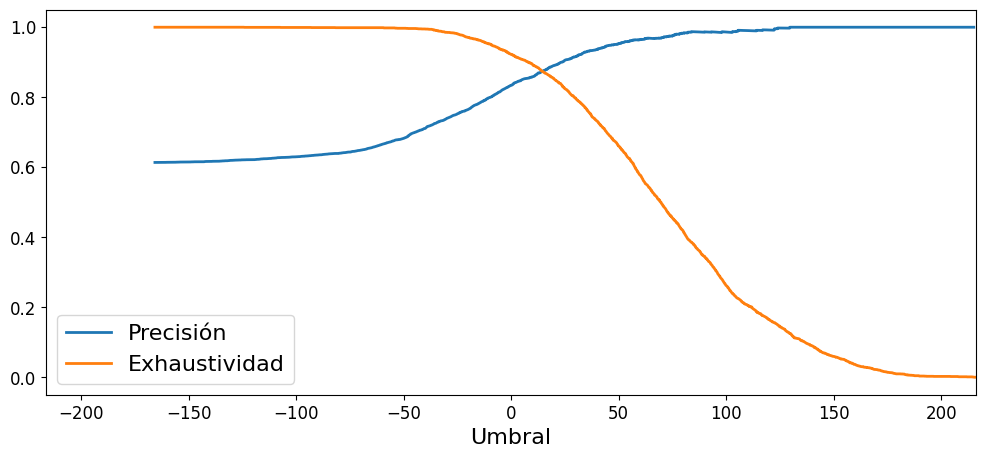

In [59]:
fig = plt.figure(figsize=(12, 5))
plt.plot(umb, precision, label='Precisión', lw=2)
plt.plot(umb, recall, label='Exhaustividad', lw=2)
plt.xlabel("Umbral", fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.xlim(-umb.max(), umb.max())
plt.show()

Otra forma de verlo es usando una curva PR (Precision/Recall). Para cada umbral se grafican ambos resultados. 

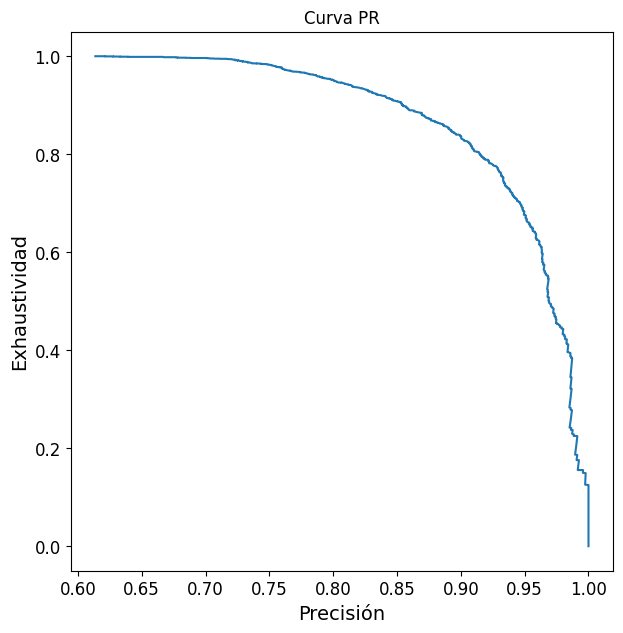

In [60]:
fig = plt.figure(figsize=(7, 7))
plt.plot(precision, recall)
#plt.axvline(0.1, ls=':', color='0.5')
plt.xlabel('Precisión')
plt.ylabel('Exhaustividad')
plt.title('Curva PR')
plt.show()

Ahora lo podemos usar para ajustar al problema que estamos resolviendo. Supongamos que queremos una precisión del 90%, podemos buscar el umbral acorde:

In [61]:
threshold_90_precision = umb[np.argmax(precision >= 0.90)]
print(threshold_90_precision)

23.433328872129664


In [62]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_90 = precision_score(t_train_1, y_train_pred_90)
recall_90 = recall_score(t_train_1, y_train_pred_90)

print("Precisión:", precision_90)
print("Exhaustividad:", recall_90)

Precisión: 0.9003927168868261
Exhaustividad: 0.8356527501656726


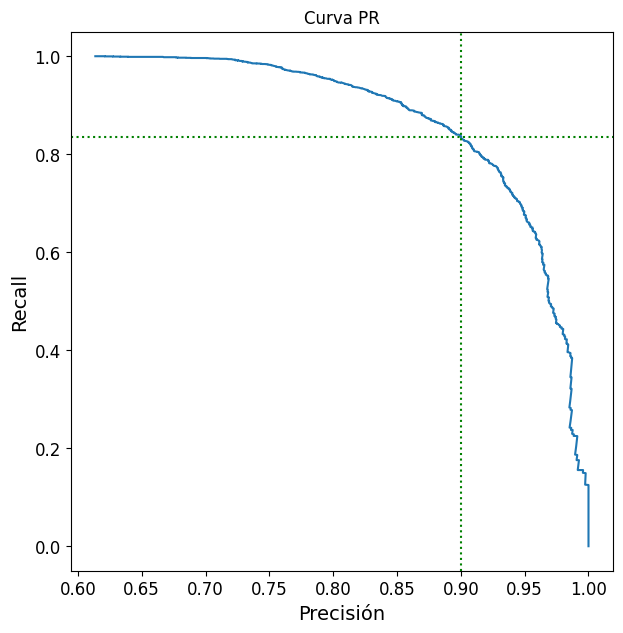

In [63]:
fig = plt.figure(figsize=(7, 7))
plt.plot(precision, recall)
plt.axvline(precision_90, ls=':', color='green')
plt.axhline(recall_90, ls=':', color='green')
plt.xlabel('Precisión')
plt.ylabel('Recall')
plt.title('Curva PR')
plt.show()


Un dato importante que se puede sacar de esto es el AUC (Area Under the Curve). Que nos da una idea general del clasificador, cuanto más cerca de 1 esté este valor, mejor va a ser.

Veamos todo esto en la opción sklearn


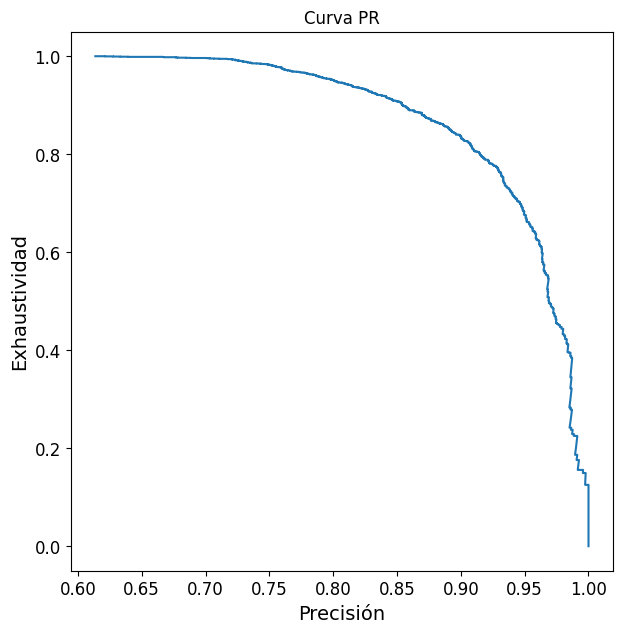

AUC: 0.9481886705013758


In [65]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score #, plot_precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(t_train_1, y_scores)

fig = plt.figure(figsize=(7, 7))
plt.plot(precisions, recalls)
plt.xlabel('Precisión')
plt.ylabel('Exhaustividad')
plt.title('Curva PR')
plt.show()
auc_score = auc(recalls, precisions)
print("AUC:", auc_score)


# Otra opción que plotea directamente
# plot_precision_recall_curve(perce, X_train, t_train_5)

Comparaciones

Otra gran útilidad de estas herramientas es para poder comparar dos clasificadores. Vamos a instanciar un random forest(*), y vamos a compararlo con el perceptrón.


(*) Lo vamos a ver en detalle más adelante, por ahora alcanza con saber que dada una imagen nos va a dar una probabilidad de a que clase pertenece, y que tarda un rato. No se asusten)

In [66]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, t_train_1, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
fpr_forest, tpr_forest, thresholds_forest = roc_curve(t_train_1, y_scores_forest)

#Grafiquemos el RF contra el Perceptrón

fig = plt.figure(figsize=(7, 7))
plt.plot([0, 1], [0, 1], color='0.5', ls=':')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR) / Recall')
plt.title('Curva ROC')
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plt.plot(fpr, tpr, label='Perceptrón')
plt.legend(loc="lower right")
plt.show()

roc_auc_perce = roc_auc_score(t_train_1, y_scores)
roc_auc_rf = roc_auc_score(t_train_1, y_probas_forest[:, 1])
print("AUC Perceptrón:", roc_auc_perce)
print("AUC RF:", roc_auc_rf)

Claramente la ROC y el AUC del random forest dio mejor que la del perceptrón. Sin embargo se suele preferir una curva PR cuando la clase positiva es más escasa o cuando te preocupan más los falsos positivos que los falsos negativos.

Miremos el caso del perceptrón, el aŕea debajo de la curva en la ROC dió muy bien, pero esto es porque hay pocos cincos. Viendo la curva PR se puede ver que todavia se puede mejorar.

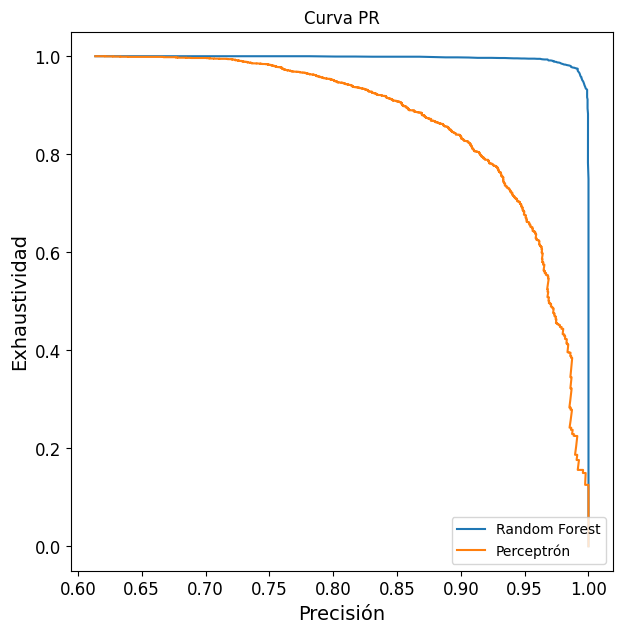

AUC RF: 0.998703226049994
AUC Perceptrón: 0.9481886705013758
Precisión RF: 0.9827586206896551
Exhaustividad RF: 0.9821073558648111


In [71]:
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(t_train_1,y_scores_forest)
precisions_perce, recalls_perce, thresholds_perce = precision_recall_curve(t_train_1, y_scores)

y_preds=cross_val_predict(forest_clf, X_train, t_train_1, cv=3, method="predict")

fig = plt.figure(figsize=(7, 7))
plt.plot(precisions_rf, recalls_rf, label="Random Forest")
plt.plot(precisions_perce, recalls_perce, label="Perceptrón")
plt.xlabel('Precisión')
plt.ylabel('Exhaustividad')
plt.title('Curva PR')
plt.legend(loc="lower right")
plt.show()

auc_score_rf = auc(recalls_rf, precisions_rf)
auc_score_perce = auc(recalls_perce, precisions_perce)

print("AUC RF:", auc_score_rf)
print("AUC Perceptrón:", auc_score_perce)
print("Precisión RF:", precision_score(t_train_1,y_preds))
print("Exhaustividad RF:", recall_score(t_train_1,y_preds))